## What is MNIST?
- handwritten digits dataset
- 손으로 쓴 숫자 데이터 세트.
- view 함수를 사용해서 숫자로 바꿈.
- `torchvision` 이라는 패키지를 이용.

In [4]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# 이걸.. 쿠바로 잘못써서,, 몇분이 날아갔다..

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [6]:

training_epochs=15
batch_size=100

In [7]:
mnist_train=dsets.MNIST(root="MNIST_data/", 
                        train=True, 
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root="MNIST_data/",
                       train=False, 
                       transform=transforms.ToTensor(), 
                       download=True)
# train=true>> train data train=False>>test data
# ToTensor 이미지형 데이터를 파이토치형 데이터로 바꿔주는 역할

data_loader=torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size,shuffle=True, drop_last=True)
#중간에 data.을 추가해야 된다!
# 그리고 첫번째 인자 dataloader가 아니라 dataset이다!
# batch_size 몇개씩 불러올래? shuffle 무작위로 부를래? 순서대로 부를래? 
# drop last 배치사이즈에 맞지 않게 남는 데이터를 자를까?

linear=torch.nn.Linear(784,10,bias=True).to(device)

criterion=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(linear.parameters(),lr=0.1)

In [9]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)
    for X,Y in data_loader:
        X=X.view(-1,28*28).to(device)
        Y=Y.to(device)
        
        optimizer.zero_grad()
        hypothesis=linear(X)
        cost=criterion(hypothesis,Y)
        cost.backward()
        optimizer.step()
        
        avg_cost+=cost/total_batch
        
    print('Epoch:','%04d' % (epoch+1),'cost=','{:.9f}'.format(avg_cost))
    
print('Learning finished')

Epoch: 0001 cost= 0.531608760
Epoch: 0002 cost= 0.359284073
Epoch: 0003 cost= 0.331268132


KeyboardInterrupt: 

잠시 epoch, batch_size, iteration 설명~
1000개 data batch_size 500이면 2번의 epoch 후에 1번의 iteration이 끝난다.

### Softmax

In [10]:
linear=torch.nn.Linear(784,10,bias=True).to(device)
# output =10인 이유는 이미지 숫자는 0~9까지 있음.

training_epochs=15
batch_size=100

criterion=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(linear.parameters(),lr=0.1)

for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)
    for X,Y in data_loader:
        X=X.view(-1,28*28).to(device)
        optimizer.zero_grad()
        hypothesis=linear(X)
        cost=criterion(hypothesis,Y)
        cost.backward()
        optimizer.step()
        avg_cost+=cost/total_batch
        
    print("Epoch: ","%04d"%(epoch+1),"cost =","{:.9f}".format(avg_cost))
    #11:27

Epoch:  0001 cost = 0.537019730
Epoch:  0002 cost = 0.359070480
Epoch:  0003 cost = 0.331466913
Epoch:  0004 cost = 0.316397995
Epoch:  0005 cost = 0.307214856
Epoch:  0006 cost = 0.300222486
Epoch:  0007 cost = 0.295077562
Epoch:  0008 cost = 0.290781766
Epoch:  0009 cost = 0.287452102
Epoch:  0010 cost = 0.284511983
Epoch:  0011 cost = 0.281673819
Epoch:  0012 cost = 0.279699981
Epoch:  0013 cost = 0.277923882
Epoch:  0014 cost = 0.276094288
Epoch:  0015 cost = 0.274461269


Accuracy:  0.8798999786376953
Label:  5
Prediction:  8


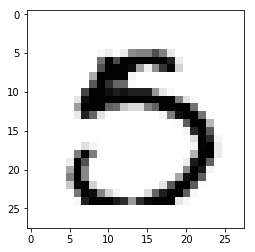

In [19]:
# 만든 모델을 테스트 셋을 이용해서 테스트해보자.
# no_grad 이 범위안에서는 gradient를 계산 안하겠다.
with torch.no_grad():
    X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test=mnist_test.test_labels.to(device)
    
    prediction=linear(X_test)
    #불러온 set을 linear 모델에 넣으면 예측값을 얻을 수 있다.
    correct_prediction=torch.argmax(prediction,1)==Y_test
    #예측과 실제 test 레이블 간에 일치하는지 계산
    accuracy=correct_prediction.float().mean()
    # 일치하는지에 대한 평균을 구하면 정확도를 알 수 있음
    print('Accuracy: ',accuracy.item())
    
    r=random.randint(0,len(mnist_test)-1)
    #test data set 중에 무작위로 이미지를 하나 뽑아서 학습한 모델에 넣는다,
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ',Y_single_data.item())
    single_prediction=linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction,1).item())
    
    #예측해본 이미지를 matplotlib를 이용해서 띄운다
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap='Greys',interpolation="nearest")
    plt.show()